## HypoThyroidism Classification
### Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
### Dataset: https://archive.ics.uci.edu/ml/datasets/thyroid+disease

 * Submitted by:
##### Kishan Vyas
##### 1st Year MTech AIML
##### PRN: 21070149028
---------------------------------------------------------------------------

* Experimental design 
1. Import Libraries
2. Load the Dataset
3. Data Cleaning
4. EDA
5. Modelling
6. Evaluation of the Models

In [ ]:
# Import modules
import numpy as np                    # for Linear algebra
import pandas as pd                   # for Data manipulation and Analysis 
import matplotlib.pyplot as plt       # for Data visualization
import seaborn as sns                 # for Data visualization and EDA

import warnings                       # for avoid warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the "hypothyroid.csv" dataset using Pandas
data = pd.read_csv('hypothyroid.csv')
data.head()

,Age,Gender,thyroxine,query on thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
# size of the dataset
data.shape
# here, 3772 samples and 30 attributes

(3772, 30)

In [ ]:
# get a concise summary of the data
data.info()
# there are 3772 samples with 30 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3772 non-null   object
 1   Gender                  3772 non-null   object
 2   thyroxine               3772 non-null   object
 3   query on thyroxine      3772 non-null   object
 4   antithyroid medication  3772 non-null   object
 5   sick                    3772 non-null   object
 6   pregnant                3772 non-null   object
 7   thyroid surgery         3772 non-null   object
 8   I131 treatment          3772 non-null   object
 9   query hypothyroid       3772 non-null   object
 10  query hyperthyroid      3772 non-null   object
 11  lithium                 3772 non-null   object
 12  goitre                  3772 non-null   object
 13  tumor                   3772 non-null   object
 14  hypopituitary           3772 non-null   object
 15  psyc

In [ ]:
# check null-values
data.isna().sum()

Age                       0
Gender                    0
thyroxine                 0
query on thyroxine        0
antithyroid medication    0
sick                      0
pregnant                  0
thyroid surgery           0
I131 treatment            0
query hypothyroid         0
query hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH measured              0
TSH                       0
T3 measured               0
T3                        0
TT4 measured              0
TT4                       0
T4U measured              0
T4U                       0
FTI measured              0
FTI                       0
TBG measured              0
TBG                       0
referral source           0
target                    0
dtype: int64

In this dataset, many missing values are present but all attributes has "object" data type. So missing values consider as a value, that's why above cell does not define any null values.So now first apply data pre-processing for cleaning the dataset.

# **Data Pre-processing**

In [ ]:
# drop unneccesary columns
extra_col = []
for c in data.columns:
    if 'measured' in c or 'query' in c:
        extra_col.append(c)

extra_col.append('TBG')
extra_col.append('referral source')
extra_col.append('psych')
extra_col.append('hypopituitary')
extra_col.append('I131 treatment')

In [ ]:
extra_col

['query on thyroxine',
 'query hypothyroid',
 'query hyperthyroid',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured',
 'TBG measured',
 'TBG',
 'referral source',
 'psych',
 'hypopituitary',
 'I131 treatment']

In [ ]:
# drop extra columns
data = data.drop(extra_col, axis=1)
data.shape

(3772, 16)

All missing values as form as '?' so replace it with null values

In [ ]:
# Convert '?' to Nan values
anomaly_col = ['Age','Gender', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for c in anomaly_col:
  data[c] = data[c].replace(['?'], np.nan)

In [ ]:
# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)
data[["Age", "TSH", "T3", "TT4", "T4U", "FTI"]] = data[["Age", "TSH", "T3", "TT4", "T4U", "FTI"]].astype(float)

In [ ]:
# Convert to categorical variable
data[["Gender","thyroxine","antithyroid medication","sick","pregnant","thyroid surgery","lithium","goitre","tumor"]] = data[[  'Gender', 'thyroxine', 'antithyroid medication', 'sick','pregnant', 'thyroid surgery', 'lithium', 'goitre', 'tumor' ]].astype('category')

In [ ]:
# now check again for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     3771 non-null   float64 
 1   Gender                  3622 non-null   category
 2   thyroxine               3772 non-null   category
 3   antithyroid medication  3772 non-null   category
 4   sick                    3772 non-null   category
 5   pregnant                3772 non-null   category
 6   thyroid surgery         3772 non-null   category
 7   lithium                 3772 non-null   category
 8   goitre                  3772 non-null   category
 9   tumor                   3772 non-null   category
 10  TSH                     3403 non-null   float64 
 11  T3                      3003 non-null   float64 
 12  TT4                     3541 non-null   float64 
 13  T4U                     3385 non-null   float64 
 14  FTI                     

In [ ]:
# check null values after type casting
data.isna().sum()

Age                         1
Gender                    150
thyroxine                   0
antithyroid medication      0
sick                        0
pregnant                    0
thyroid surgery             0
lithium                     0
goitre                      0
tumor                       0
TSH                       369
T3                        769
TT4                       231
T4U                       387
FTI                       385
target                      0
dtype: int64

## Handle missing values

In [ ]:
# for 'Age' 
data['Age'].unique()

array([ 41.,  23.,  46.,  70.,  18.,  59.,  80.,  66.,  68.,  84.,  67.,
        71.,  28.,  65.,  42.,  63.,  51.,  81.,  54.,  55.,  60.,  25.,
        73.,  34.,  78.,  37.,  85.,  26.,  58.,  64.,  44.,  48.,  61.,
        35.,  83.,  21.,  87.,  53.,  77.,  27.,  69.,  74.,  38.,  76.,
        45.,  36.,  22.,  43.,  72.,  82.,  31.,  39.,  49.,  62.,  57.,
         1.,  50.,  30.,  29.,  75.,  19.,   7.,  79.,  17.,  24.,  15.,
        32.,  47.,  16.,  52.,  33.,  13.,  10.,  89.,  56.,  20.,  90.,
        40.,  88.,  14.,  86.,  94.,  12.,   4.,  11.,   8.,   5., 455.,
         2.,  91.,   6.,  nan,  93.,  92.])

In [ ]:
data['Age'] = data['Age'].replace({455:45})

In [ ]:
# replace null value with the mode
print(data['Gender'].unique())
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
print(data['Gender'].unique())
data['Gender'].value_counts()

['F', 'M', NaN]
Categories (2, object): ['F', 'M']
['F', 'M']
Categories (2, object): ['F', 'M']


F    2630
M    1142
Name: Gender, dtype: int64

In [ ]:
# to cinvert target from P and N to 1 and 0
def class_convert(binaryClass):
    if binaryClass=='P':
        return 1
    else:
        return 0

In [ ]:
data['target'] = data['target'].apply(class_convert)

In [ ]:
# drop the missing values
data.dropna(inplace=True)
print(data.shape)

(2751, 16)


In [ ]:
# categorical variables
cat_col = []
for i in data.columns:
  if data[i].dtype.name == 'category':
    cat_col.append(i)

In [ ]:
# Replace all the f and t to True and False
for i in cat_col[:]:
  data[i] = data[i].str.replace('f','0').str.replace('t','1')

In [ ]:
data.head()

,Age,Gender,thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,target
0,41.0,F,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
4,70.0,F,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1
7,80.0,F,0,0,0,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0,1
8,66.0,F,0,0,0,0,0,0,0,1,0.60,2.2,123.0,0.93,132.0,1
9,68.0,M,0,0,0,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0,1


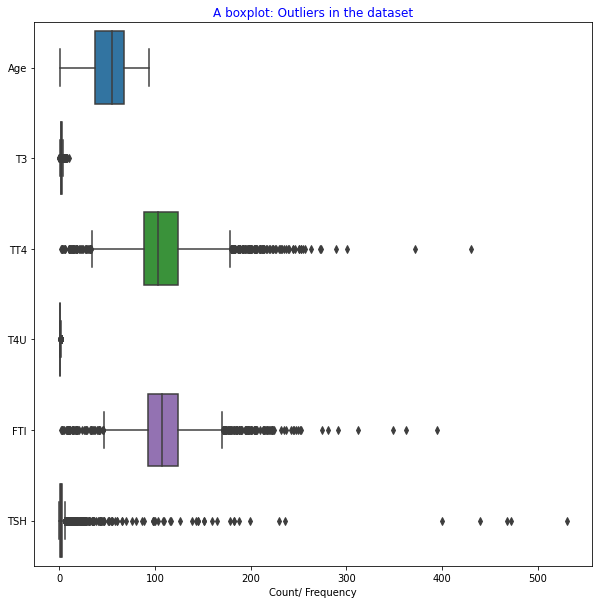

In [ ]:
# check for outliers
col = data[['Age', 'T3', 'TT4', 'T4U', 'FTI', 'TSH']]
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=col , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

# boxplot -> gives a good indication of how the values in the data are spread out
# minimum, q1, q2, q3, maximum
# outliers -> abnormal distance from random samples
# observation -> TT4, TSH and FTI has large number of outliers

In [ ]:
from math import sqrt
# Drop Outliers
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

data = data[~( (data < lower_range)|(data > upper_range) ).any(axis=1)]

In [ ]:
# size of the dataset
print("Shape before removing outliers: ", data.shape)
print("Shape after removing outliers: ", data.shape)

Shape before removing outliers:  (2751, 16)
Shape after removing outliers:  (2179, 16)


# **Apply EDA**

In [ ]:
data.columns

Index(['Age', 'Gender', 'thyroxine', 'antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'lithium', 'goitre', 'tumor', 'TSH',
       'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Patients with Hypothyroid vs Not with Hypothyroid')

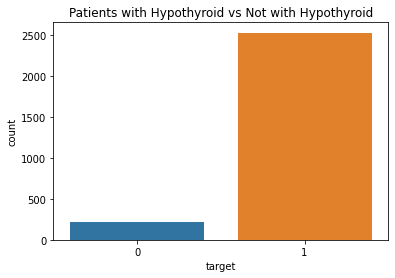

In [ ]:
# countPlot for hypothayroid : positive or nagetive
sns.countplot(data['target'])
plt.title('Patients with Hypothyroid vs Not with Hypothyroid')
# observation -> imbalanced dataset: mostly patients have hypothyroid

Text(0.5, 1.0, 'Gender')

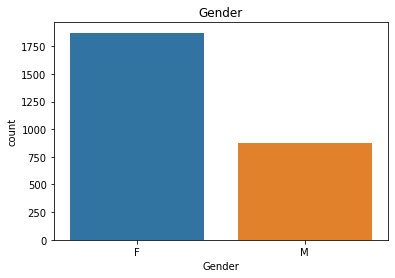

In [ ]:
sns.countplot(data['Gender'])
plt.title("Gender")
# observation -> female patients are more then male patients
#             -> female patients around 1750
#             -> male patients between 750 to 1000

Text(0.5, 1.0, 'Patients with Goitre')

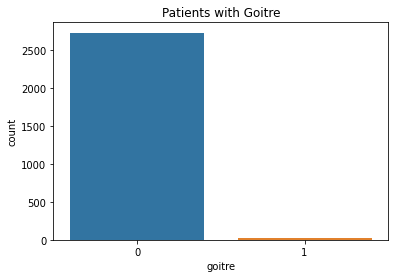

In [ ]:
# Goitre: A swelling in the neck resulting from an enlarged thyroid gland
sns.countplot(data['goitre'])
plt.title("Patients with Goitre")
# observation -> mostly patients don't suffer with Goitre

Gender
F    1698
M     830
Name: target, dtype: int64


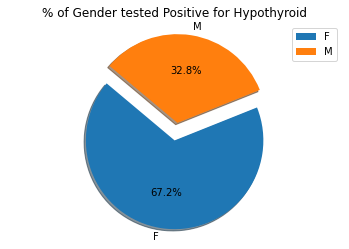

In [ ]:
# Check on the percentage of gender that have tested positive for Hypothyroid
positive_patients = data[data['target'] == 1]
status = positive_patients['target'].groupby(positive_patients['Gender']).count()
print(status)
gender = ['F', 'M']
explode = (0.2, 0)

plt.pie(status, labels=gender, explode=explode, autopct= '%1.1f%%', shadow = True, startangle= 140)
plt.title('% of Gender tested Positive for Hypothyroid')
plt.axis('equal')
plt.legend()
plt.show()

# observation -> from hypothyroid patients female patients are more compare to male patients.

Gender
F    1872
M     879
Name: goitre, dtype: int64


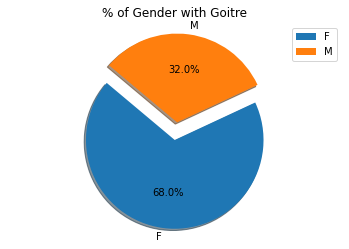

In [ ]:
# Check on the percentage of gender with goitre
goitre = data['goitre'].groupby(data['Gender']).count()
gender = ['F', 'M']
print(goitre)
explode = (0.2, 0)

plt.pie(goitre, labels=gender, explode=explode, shadow = True, autopct= '%1.1f%%', startangle= 140)
plt.axis('equal')
plt.title('% of Gender with Goitre')
plt.legend()
plt.show()
# observation -> female patients are more with goitre compare to male patients 

Text(0.5, 1.0, 'Patients on Thyroxine')

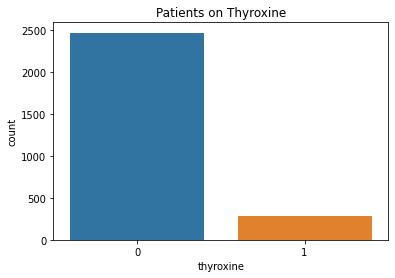

In [ ]:
# Patients on Thyroxine
sns.countplot(data['thyroxine'])
plt.title("Patients on Thyroxine")

Text(0.5, 1.0, 'Patients on AntiThyroid Medication')

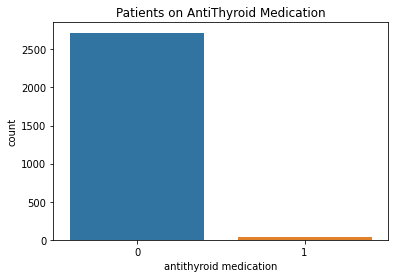

In [ ]:
# Patients on AntiThyroxine
sns.countplot(data['antithyroid medication'])
plt.title("Patients on AntiThyroid Medication")
# observation -> mostly patients don't have antithyroid 

Text(0.5, 1.0, 'Patients had Thyroid Surgery')

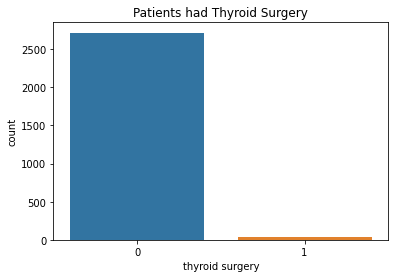

In [ ]:
# Those patients that have had Thyroid Surgery
sns.countplot(data['thyroid surgery'])
plt.title("Patients had Thyroid Surgery")

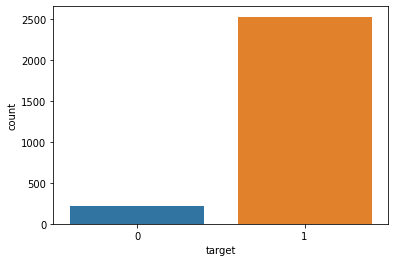

In [ ]:
sns.countplot(data['target'])

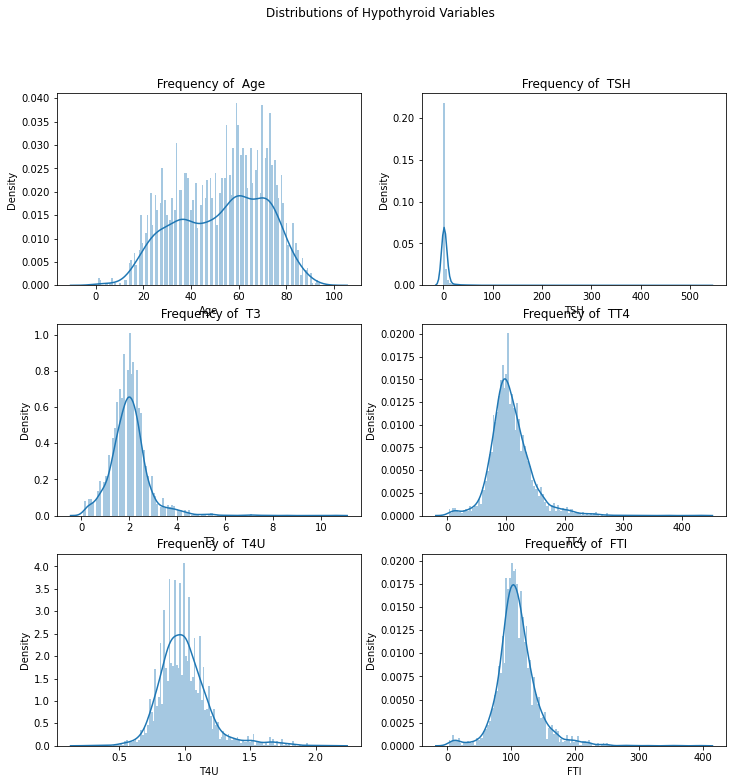

In [ ]:
# Distribution of the Hypothyroid variables
# distplot -> to check variation in continues data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
fig.suptitle('Distributions of Hypothyroid Variables')

num = data[['Age','TSH','T3','TT4','T4U','FTI']]

for ax, values, name in zip(axes.flatten(), num.values.T, num.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(num.values.T[1]))//2)
    ax.set(title=" \n Frequency of  {}".format(name), xlabel=name)

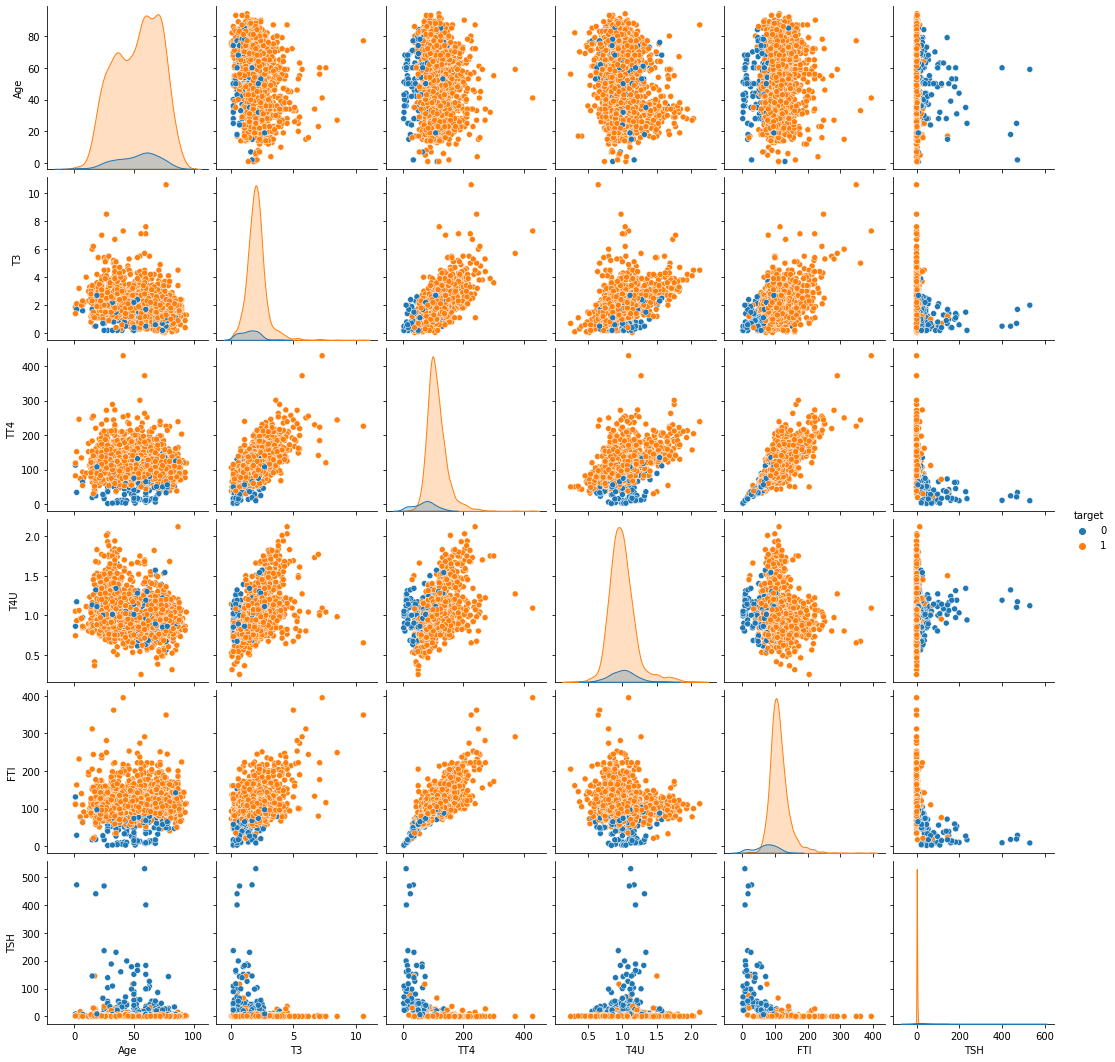

In [ ]:
# check correlation between two variables using pairplot 
features = data[['Age', 'T3', 'TT4', 'T4U', 'FTI', 'TSH', 'target']]
sns.pairplot(features, hue='target')

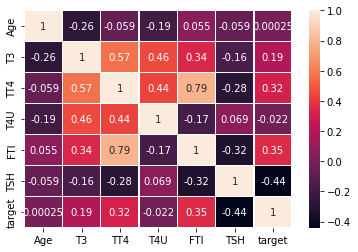

In [ ]:
sns.heatmap(features.corr(), annot=True, linewidth=0.5)

# **Under Sampling**

In [ ]:
# check data balanced or imbalanced
print(data['target'].value_counts())

# observation -> dataset is imbalanced

1    2528
0     223
Name: target, dtype: int64


In [ ]:
# handle imbalanced data
# class count
class_count_1, class_count_0 = data.target.value_counts()

# Separate class
class_1 = data[data['target'] == 1]
class_0 = data[data['target'] == 0]

print(class_1.shape)
print(class_0.shape)

(2528, 16)
(223, 16)


In [ ]:
# apply under sampling
class_1_under = class_1.sample(class_count_0)
data_test_under = pd.concat([class_1_under, class_0], axis=0)
data_test_under.shape

(446, 16)

Random under-sampling
1    223
0    223
Name: target, dtype: int64


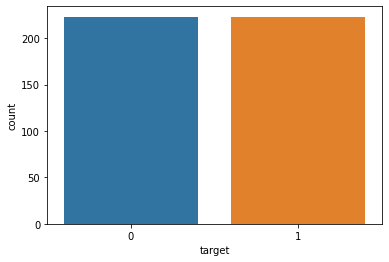

In [ ]:
# visualize samples
print('Random under-sampling')
print(data_test_under['target'].value_counts())
sns.countplot(data_test_under['target'])

In [ ]:
data_test_under.head()

,Age,Gender,thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,target
1294,25.0,F,0,0,0,0,0,0,0,0,0.700,1.6,94.0,0.93,101.0,1
1207,41.0,F,1,0,0,0,0,0,0,0,15.000,1.7,119.0,0.99,120.0,1
2376,65.0,F,0,0,1,0,0,0,0,0,0.025,3.9,133.0,1.23,108.0,1
909,19.0,M,1,0,0,0,0,0,0,0,0.005,2.0,147.0,0.90,163.0,1
381,61.0,M,0,0,1,0,0,0,0,0,0.600,1.0,96.0,0.93,104.0,1


In [ ]:
# dummies variable for 'Gender' attribute
gender_dummies = pd.get_dummies(data_test_under['Gender'])

In [ ]:
# merge the data with dummies variable for 'Gender'
data_test_under = pd.concat([gender_dummies,data_test_under],axis=1,join='inner')
data_test_under.drop('Gender', axis=1, inplace=True)
data_test_under.head()

,F,M,Age,thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,target
1294,1,0,25.0,0,0,0,0,0,0,0,0,0.700,1.6,94.0,0.93,101.0,1
1207,1,0,41.0,1,0,0,0,0,0,0,0,15.000,1.7,119.0,0.99,120.0,1
2376,1,0,65.0,0,0,1,0,0,0,0,0,0.025,3.9,133.0,1.23,108.0,1
909,0,1,19.0,1,0,0,0,0,0,0,0,0.005,2.0,147.0,0.90,163.0,1
381,0,1,61.0,0,0,1,0,0,0,0,0,0.600,1.0,96.0,0.93,104.0,1


In [ ]:
# Split data into train and test using sci-kit learn
# 80% dataset consider as train_data
# 20% dataset consider as test_data
from sklearn.model_selection import train_test_split
x = data_test_under.drop('target', axis=1).values
y = data_test_under['target'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [ ]:
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# import different types of classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# apply classifiers
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression"
]

classifiers = [
    KNeighborsClassifier(3),                                                  
    SVC(kernel="linear", C=0.025),                                            
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),           
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [ ]:
# calculate score for different classifiers
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [ ]:
df = pd.DataFrame()
df['Names'] = names
df['Score'] = scores
df

,Names,Score
0,Nearest Neighbors,0.744444
1,Linear SVM,0.788889
2,Gradient_Boosting,0.788889
3,Decision Tree,0.777778
4,Random Forest,0.755556
5,AdaBoost,0.777778
6,Naive Bayes,0.477778
7,Logistic_Regression,0.766667


In [ ]:
# apply Logistic regression because it has highest score
log_reg = LogisticRegression()             # object

log_reg.fit(x_train, y_train)                                               # fit the model with data

LogisticRegression()

In [ ]:
# predict the test data
y_predicted = rf.predict(x_test)

In [ ]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        47
           1       0.71      0.95      0.81        43

    accuracy                           0.79        90
   macro avg       0.82      0.80      0.79        90
weighted avg       0.83      0.79      0.78        90



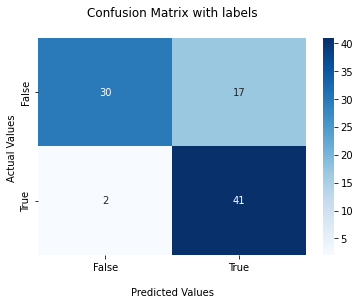

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
# rou curve
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(y_test,y_predicted)

0.7958931222167245

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_predicted)
auc = auc(fpr,tpr)

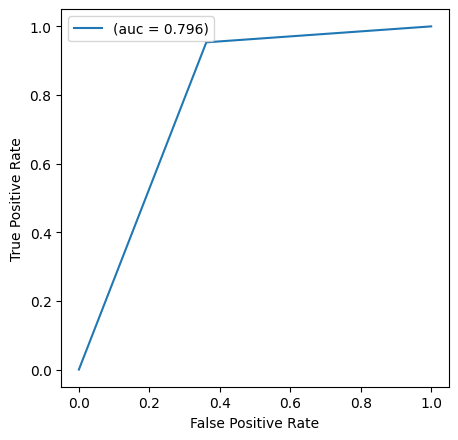

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **Over sampling**

In [ ]:
# count for class 0 and 1
class_count_1, class_count_0

(2528, 223)

In [ ]:
# apply oversamplling
data_class_0_over = class_0.sample(class_count_1,replace=True)
data_test_over = pd.concat([class_1, data_class_0_over],axis = 0)
print("Random Over-Sampling")
print(data_test_over['target'].value_counts())

Random Over-Sampling
1    2528
0    2528
Name: target, dtype: int64


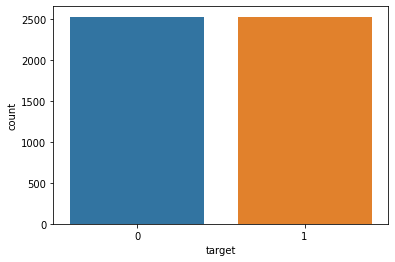

In [ ]:
sns.countplot(data_test_over['target'])

In [ ]:
# dummies variable for 'Gender' attribute
gender_dummies1 = pd.get_dummies(data_test_over['Gender'])

In [ ]:
# merge the data with dummies variable for 'Gender'
data_test_over = pd.concat([gender_dummies1, data_test_over],axis=1,join='inner')
data_test_over.drop('Gender', axis=1, inplace=True)
data_test_under.head()

,F,M,Age,thyroxine,antithyroid medication,sick,pregnant,thyroid surgery,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,target
1294,1,0,25.0,0,0,0,0,0,0,0,0,0.700,1.6,94.0,0.93,101.0,1
1207,1,0,41.0,1,0,0,0,0,0,0,0,15.000,1.7,119.0,0.99,120.0,1
2376,1,0,65.0,0,0,1,0,0,0,0,0,0.025,3.9,133.0,1.23,108.0,1
909,0,1,19.0,1,0,0,0,0,0,0,0,0.005,2.0,147.0,0.90,163.0,1
381,0,1,61.0,0,0,1,0,0,0,0,0,0.600,1.0,96.0,0.93,104.0,1


In [ ]:
data_test_over.shape

(5056, 17)

In [ ]:
# Split data into train and test using sci-kit learn
# 80% dataset consider as train_data
# 20% dataset consider as test_data
x = data_test_over.drop('target', axis=1).values
y = data_test_over['target'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [ ]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# check feature importance using GradintBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 200, max_depth= 5, min_samples_split=3)
gb.fit(x, y)

print(gb.feature_importances_)

[4.33413414e-13 9.24646473e-13 9.76108201e-05 9.37012106e-03
 1.16674576e-07 7.59886899e-12 2.82707279e-16 1.66053803e-03
 5.89346015e-11 0.00000000e+00 0.00000000e+00 9.50519399e-01
 4.40363089e-03 8.42672108e-03 5.64054555e-06 2.55162219e-02]


In [ ]:
# import different types of classifiers
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB

In [ ]:
# apply classifiers
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [ ]:
# calculate score for different classifiers
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [ ]:
df1 = pd.DataFrame()
df1['Names'] = names
df1['Score'] = scores
df1

,Names,Score
0,Nearest Neighbors,0.946640
1,Linear SVM,0.855731
2,Gradient_Boosting,0.990119
3,Decision Tree,0.991107
4,Random Forest,0.881423
5,AdaBoost,0.986166
6,Naive Bayes,0.520751
7,Logistic_Regression,0.957510


In [ ]:
# apply Decesion tree
def train_using_gini(x_train, x_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(x_train, y_train)
    return clf_gini

def train_using_entropy(x_train, x_test, y_train):
    # decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)
    # performing training
    clf_entropy.fit(x_train, y_train)
    return clf_entropy

# function to make prediction
def prediction(X_test, clf_object):
    # prediction on test with gini-index
    y_pred = clf_object.predict(X_test)
    print("predicted values")
    print(y_pred)
    return y_pred

In [ ]:
# function to calculate accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def cal_accu(y_test, y_pred):
    print('\n')
    print("Confusion matrix: \n ", confusion_matrix(y_test, y_pred))
    print('\n')
    print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
    print('\n')
    print("Report: \n", classification_report(y_test, y_pred))
    return cal_accu

In [ ]:
def main():
    clf_gini = train_using_gini(x_train, x_test, y_train)
    clf_entropy = train_using_entropy(x_train, x_test, y_train)
    
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accu(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accu(y_test, y_pred_entropy)

In [ ]:
if __name__=="__main__":
    main()

Results Using Gini Index:
predicted values
[0 1 0 ... 0 1 1]


Confusion matrix: 
  [[484   1]
 [ 20 507]]


Accuracy:  97.92490118577075


Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       485
           1       1.00      0.96      0.98       527

    accuracy                           0.98      1012
   macro avg       0.98      0.98      0.98      1012
weighted avg       0.98      0.98      0.98      1012

Results Using Entropy:
predicted values
[0 1 0 ... 0 1 1]


Confusion matrix: 
  [[484   1]
 [  8 519]]


Accuracy:  99.1106719367589


Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       485
           1       1.00      0.98      0.99       527

    accuracy                           0.99      1012
   macro avg       0.99      0.99      0.99      1012
weighted avg       0.99      0.99      0.99      1012

